In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(13,9)})

In [4]:
path = "NetflixOriginals.xls"
dat = pd.read_csv(path)
dat["Premiere"]= pd.to_datetime(dat["Premiere"])
dat

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [8]:
df = dat # creating a backup

In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [10]:
dat.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


## **Task #1**

Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [11]:
df1 = df[df['Runtime'] >= 120] #120 dk ve uzeri filmler listelendi
df1

,Title,Genre,Premiere,Runtime,IMDB Score,Language
5,Drive,Action,2019-11-01,147,3.5,Hindi
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi
16,Ghost Stories,Horror anthology,2020-01-01,144,4.3,Hindi
23,The Girl on the Train,Thriller,2021-02-26,120,4.4,Hindi
...,...,...,...,...,...,...
562,The Trial of the Chicago 7,Drama,2020-10-16,130,7.8,English
564,Icarus,Documentary,2017-08-04,120,7.9,English
565,Marriage Story,Drama,2019-12-06,136,7.9,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English


[Text(0.5, 0, 'Number of Movies')]

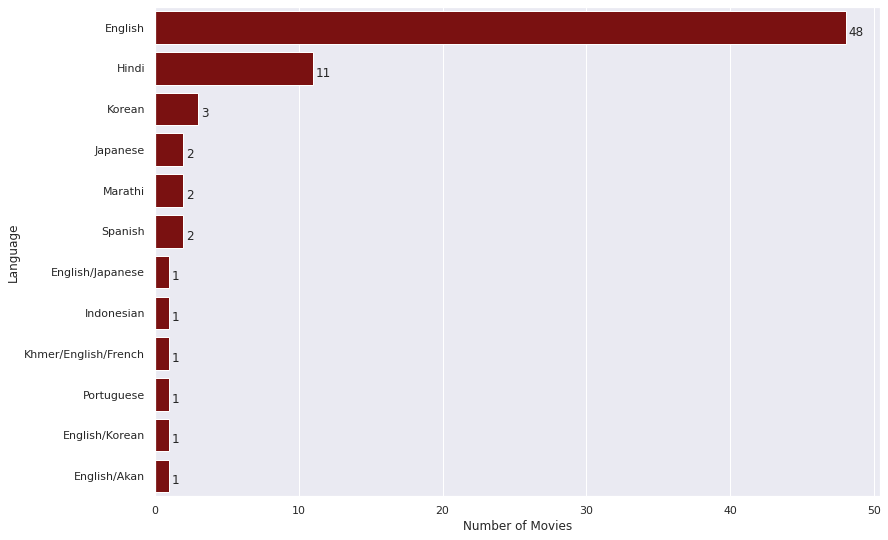

In [12]:
ax = sns.countplot(data=df1, y = "Language", color = "darkred",
                   order=df1["Language"].value_counts().index)
for p in ax.patches:
  cnt = "{:.0f}".format(p.get_width())
  x = p.get_x() + p.get_width() + 0.2
  y = p.get_y() + p.get_height() - 0.2
  ax.annotate(cnt, (x,y))
ax.set(xlabel="Number of Movies")

## **Task #2**

2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [14]:
df2 = df[(df["Genre"] == "Documentary") & (df["Premiere"] >= "2019-01-01") & (df["Premiere"] < "2020-07-01")]
df2.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English


## **Task #3**

İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [15]:
df3 = dat[dat["Language"].str.contains("English")]
df3.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
8,Paradox,Musical/Western/Fantasy,2018-03-23,73,3.9,English
10,Searching for Sheela,Documentary,2021-04-22,58,4.1,English


In [16]:
df3[df3["IMDB Score"] == df3["IMDB Score"].max()]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English


In [17]:
df3[df3["IMDB Score"] == df3["IMDB Score"].max()].iloc[0]["Genre"]

'Documentary'

## **Task #4**

'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [22]:
df4 = df[df["Language"] == "Hindi"]
print(round(df4["Runtime"].mean(),2), "minutes")

115.79 minutes


## **Task #5**

'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [23]:
print(df["Genre"].nunique(),"|",df["Genre"].unique())

115 | ['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian musical' 'Romantic teen drama'
 'Family' 'Dark comedy' 'Comedy horror' 'Psychological thriller' 'Biopic'
 'Science fiction/Thriller' 'Mockumentary' 'Satire' 'One

## **Task #6**

Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [24]:
df6 = df["Language"].value_counts()
df6[:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

## **Task #7**

IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [26]:
df.sort_values(by="IMDB Score", ascending = False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
571,13th,Documentary,2016-10-07,100,8.2,English


## **Task #8**

IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


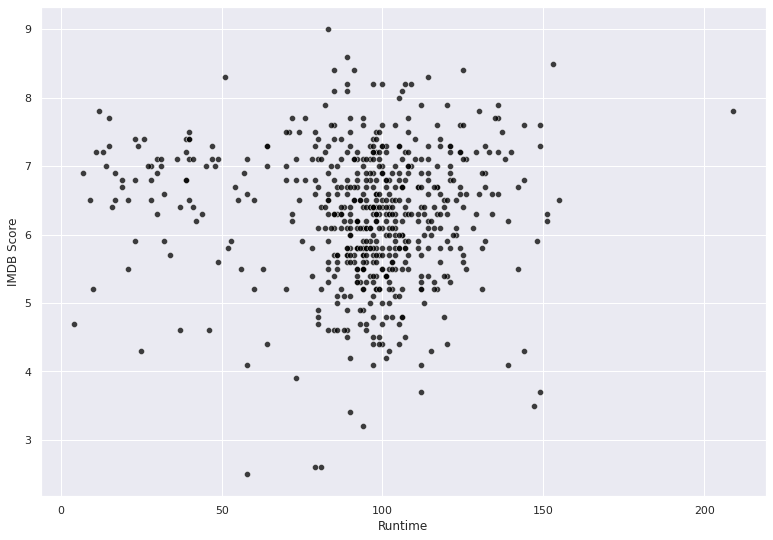

In [27]:
sns.scatterplot("Runtime", "IMDB Score", data=dat, alpha=.75, color = "black")

Before conducting a statistical test for correlation, we might want to sketch a graph of these two numeric variables. "Graphically", there is no correlation is seen however we still need a statistical test for a solid evidence. Pearson correlation coefficient (r) can bu used for this.

In [28]:
from scipy.stats import pearsonr
r, p_val = pearsonr(dat["Runtime"], dat["IMDB Score"])
round(r,2),round(p_val,2)

(-0.04, 0.32)

The sign of r is negative, which suggest that a possible negative relationship but its magnitude is too small. Taking into account that p value is 0.32, we cannot conclude a linear correlation between IMDb score of movies and their runtime.

## **Task #9**

IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

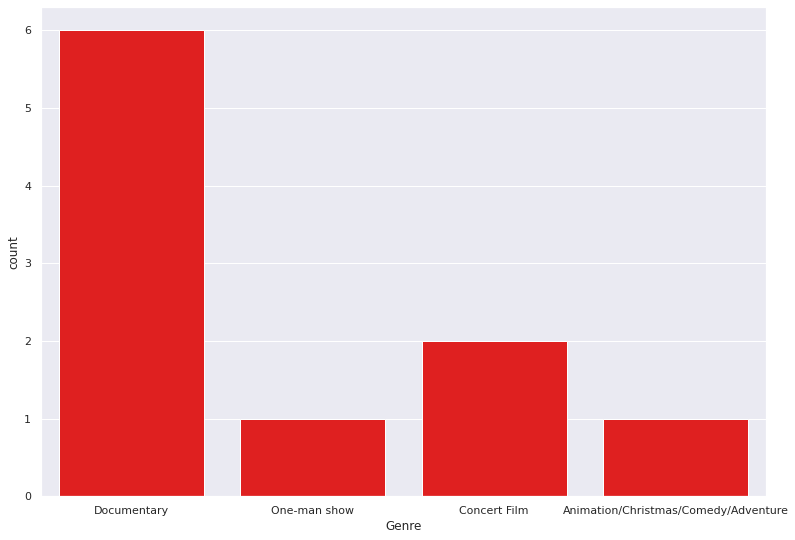

In [29]:
df9 = dat.sort_values(by="IMDB Score", ascending = False).head(10)
df9Chart = sns.countplot(data=df9, x = "Genre", color = "red")


## **Task #10**

'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [30]:
df.sort_values(by="Runtime", ascending = False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
247,Citation,Drama,2020-11-06,151,6.2,English
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
509,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
543,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
5,Drive,Action,2019-11-01,147,3.5,Hindi


## **Task #11**

Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [31]:
df["Year"] = pd.DatetimeIndex(df["Premiere"]).year
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020


In [32]:
df.Premiere.max() # yayına en son giren filmin yayın tarihi

Timestamp('2021-05-27 00:00:00')

[Text(0, 0.5, 'Number of Movies')]

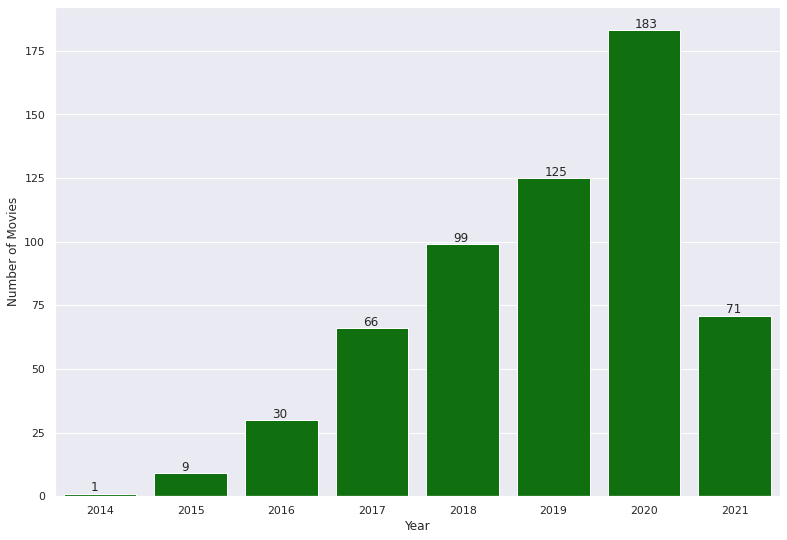

In [33]:
ax = sns.countplot(data=df, x = "Year", color = "green")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))
ax.set(ylabel="Number of Movies")

## **Task #12**

Hangi dilde yayınlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

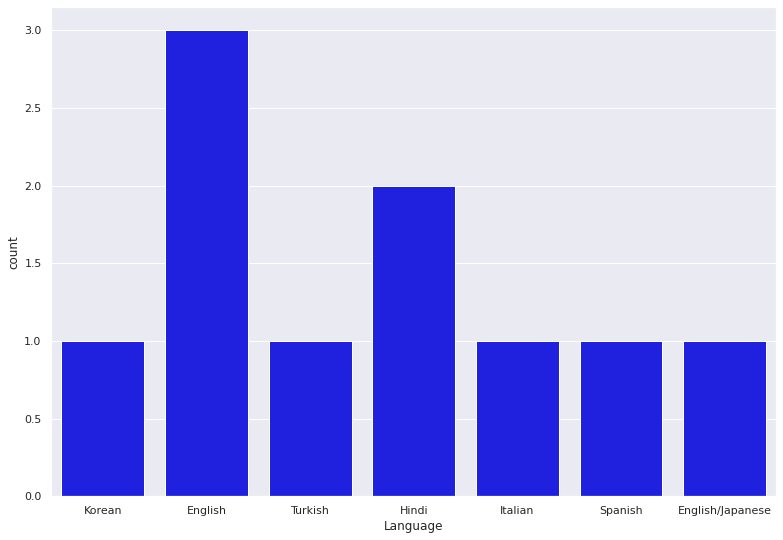

In [34]:
df12 = dat.sort_values(by="IMDB Score", ascending = False).tail(10)
df9Chart = sns.countplot(data=df12, x = "Language", color = "blue")

## **Task #13**

Hangi yılın toplam "runtime" süresi en fazladır?

In [35]:
df13 = df.groupby("Year").sum()
df13

,Runtime,IMDB Score
Year,,
2014,81,6.4
2015,814,61.9
2016,2766,195.4
2017,6129,423.9
2018,9405,629.7
2019,10856,782.4
2020,17384,1133.7
2021,7214,429.3


In [36]:
print(f"{df13.Runtime.idxmax()} has the highest runtime with a total of {df13.Runtime.max()} minutes.")

2020 has the highest runtime with a total of 17384 minutes.


## **Task #14**

Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [37]:
df14=df["Genre"]
df_14=df14.value_counts()
df_14[:1]

Documentary    159
Name: Genre, dtype: int64

## **Task #15**

Veri setinde outlier veri var mıdır? Açıklayınız.

Runtime and IMDb score are numeric variables in this data set. So let's check them:

In [52]:
sns.set(rc={'figure.figsize':(7,5)})

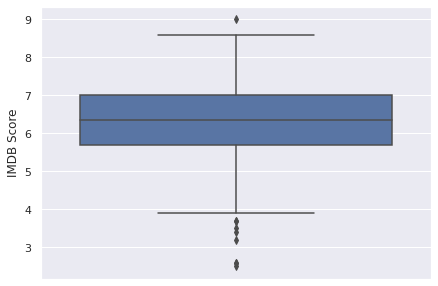

In [53]:
ax = sns.boxplot(y="IMDB Score", data=df)

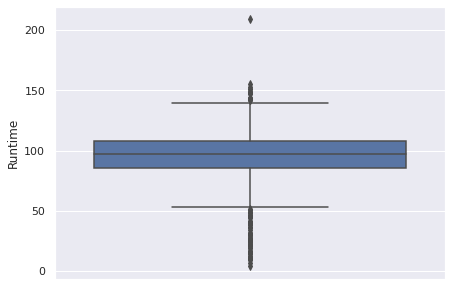

In [54]:
ax = sns.boxplot(y="Runtime", data=df)

Apparently, both columns have some outliers. For IMDB Score, ratings slightly below 4 and equal to 9 are outliers. In Runtime column, we have much more outliers, many of them comes from short movies, and movies last nearly 2.5 hours.